<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Информация-о-датафрейме" data-toc-modified-id="Информация-о-датафрейме-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Информация о датафрейме</a></span></li><li><span><a href="#Информация-о-признаках" data-toc-modified-id="Информация-о-признаках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Информация о признаках</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Прогнозирование" data-toc-modified-id="Прогнозирование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Прогнозирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Кластеризацию-клиентов" data-toc-modified-id="Кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризацию клиентов</a></span><ul class="toc-item"><li><span><a href="#Определение-количества-кластеров" data-toc-modified-id="Определение-количества-кластеров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Определение количества кластеров</a></span></li><li><span><a href="#Кластеризация-на-основании-алгоритма-K-Means" data-toc-modified-id="Кластеризация-на-основании-алгоритма-K-Means-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Кластеризация на основании алгоритма K-Means</a></span></li><li><span><a href="#Информация-по-кластерам" data-toc-modified-id="Информация-по-кластерам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Информация по кластерам</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Разработка стратегии взаимодействия с клиентами сети фитнес-центров
Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  
Необходимо провести анализ и подготовить план действий по удержанию клиентов, а именно:

    1) спрогнозировать вероятность оттока клиента в следующем месяце;
    2) сформировать типичные портреты клиентов;
    3) проанализировать признаки, наиболее сильно влияющие на отток;
    4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

## Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# Команда для игнорирования предупреждений 
import warnings
warnings.filterwarnings('ignore')

Отключение вывода в прокручиваемом окне

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Загрузка данных
gym_churn = pd.read_csv('D:/DF_practicum/11/gym_churn.csv')
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Описание данных**

В датафреме gym_churn содержится следующая информация:

- 'Churn' — факт оттока в текущем месяце;

*Данные клиента за предыдущий до проверки факта оттока месяц:*
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Исследовательский анализ данных

### Информация о датафрейме

In [5]:
print('Начало, конец и случайные строки датафрейма:')
display(gym_churn.head(), gym_churn.tail(), gym_churn.sample(5))

print('\nРазмер датафрейма:')
print(gym_churn.shape)

print('\nСтатистические данные:')
display(gym_churn.describe().T)

print('\nОбщая информация:\n')
gym_churn.info()

print('\n\nКоличество пропусков в столбцах:')
nan = pd.DataFrame(columns=['column_names'], data=gym_churn.columns)
nan['NaN'] = gym_churn.isna().sum().values
display(nan)

print('\nКоличество дубликатов строк:',
      gym_churn.duplicated().sum(), '\n')

Начало, конец и случайные строки датафрейма:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3001,0,1,0,0,1,1,1,32,37.751381,1.0,2,2.517848,2.401310,0
2409,1,1,1,0,1,1,1,29,134.623346,1.0,3,1.872952,1.877288,0
2616,1,1,0,0,0,1,0,26,275.948965,1.0,0,2.153834,1.847636,1
3293,1,1,0,0,1,1,1,31,225.744906,1.0,4,1.562964,1.524219,0
3066,1,1,1,1,0,6,0,29,36.662021,6.0,3,2.445807,2.433905,0



Размер датафрейма:
(4000, 14)

Статистические данные:


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4

,column_names,NaN
0,gender,0
1,Near_Location,0
2,Partner,0
3,Promo_friends,0
4,Phone,0
5,Contract_period,0
6,Group_visits,0
7,Age,0
8,Avg_additional_charges_total,0
9,Month_to_end_contract,0



Количество дубликатов строк: 0 



In [6]:
# Проверю, что в данных нет ошибочных значений
list = ['gender',
        'Near_Location',
        'Partner',
        'Promo_friends',
        'Phone',
        'Contract_period',
        'Group_visits',
        'Age',
        'Month_to_end_contract',
        'Lifetime',
        'Churn']
for i in list:
    print(gym_churn[i].value_counts())

1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: Near_Location, dtype: int64
0    2053
1    1947
Name: Partner, dtype: int64
0    2766
1    1234
Name: Promo_friends, dtype: int64
1    3614
0     386
Name: Phone, dtype: int64
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
0    2351
1    1649
Name: Group_visits, dtype: int64
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: Month_to_end_contract, dtype: int64
1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     

In [7]:
# Изменение типа на целочисленный
gym_churn['Month_to_end_contract'] = gym_churn['Month_to_end_contract'].astype('int64')

### Информация о признаках

In [8]:
# Средние значения признаков тех, кто ушел в отток и тех, кто остался 
gym_churn.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


По средним значениям ушедших и оставшихся наблюдается:
- Различий не наблюдается в параметрах **пол** и **наличие контактного телефона**.

- Среди оставшихся клиентов, количество тех, кто **живёт или работает рядом** больше, чем среди ушедших (87% против 77%).

- Среди оставшихся клиентов, количество **сотрудников компаний-партнёров** больше, чем среди ушедших (53% против 36%).

- Среди оставшихся клиентов, количество тех, кто **пришли в рамках акции приведи друга** больше, чем среди ушедших (35% против 18%).

- Среди оставшихся клиентов, **длительность текущего действующего абонемента** составляет 5,7 месяцев, а у ушедших 1,7 месяцев.

- Среди оставшихся клиентов, количество тех, кто **посещает групповые занятия** больше, чем среди ушедших (46% против 27%).

- Среди оставшихся клиентов, **средний возраст** составляет 30 лет, а у ушедших 27 лет.

- Среди оставшихся клиентов, **суммарная выручка от других услуг фитнес-центра** составляет 158 у.е., а у ушедших 115 у.е.

- Среди оставшихся клиентов, **срок до окончания текущего действующего абонемента** составляет 5,3 месяцев, а у ушедших 1,7 месяцев.

- Среди оставшихся клиентов, **время с момента первого обращения в фитнес-центр** составляет 4,7 месяцев, а у ушедших 1 месяц.

- Среди оставшихся клиентов, **средняя частота посещений в неделю за все время с начала действия абонемента** составляет 2 раза, а у ушедших 1,5 раз.

- Среди оставшихся клиентов, **средняя частота посещений в неделю за предыдущий месяц** составляет 2 раза, а у ушедших 1 раз.

In [9]:
# Количество и доля оставшихся и ушедших клиентов
class_0_1 = gym_churn['Churn'].value_counts().reset_index()
class_0_1['%'] = (class_0_1['Churn'] / class_0_1['Churn'].sum() * 100).round(1)
class_0_1 = class_0_1.drop('index', axis=1)
class_0_1.columns = ['count', '%']
class_0_1

,count,%
0,2939,73.5
1,1061,26.5


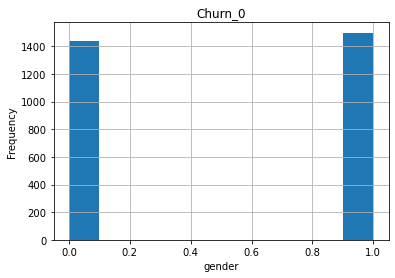

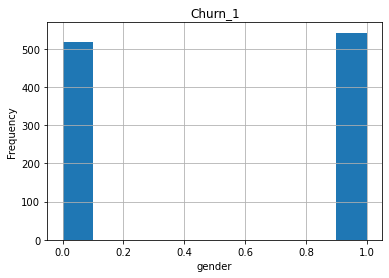

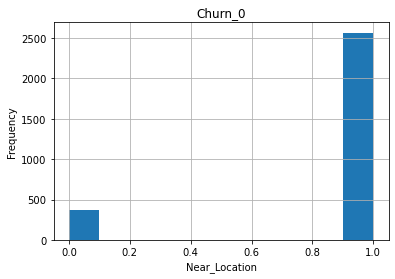

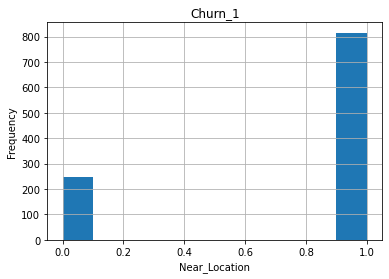

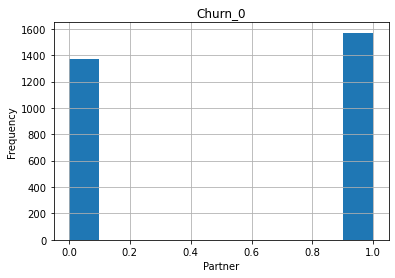

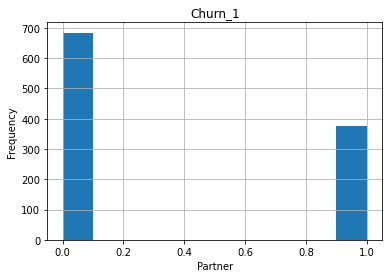

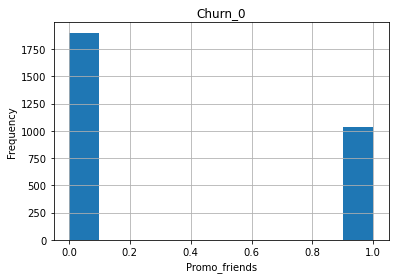

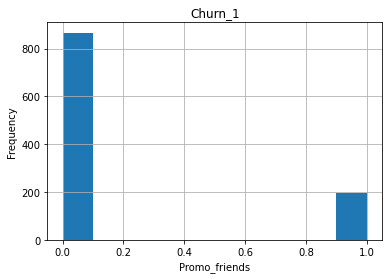

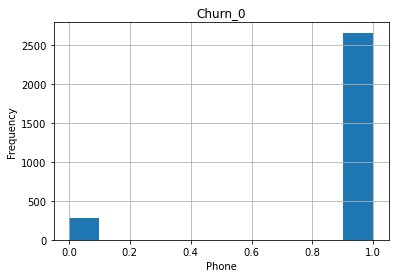

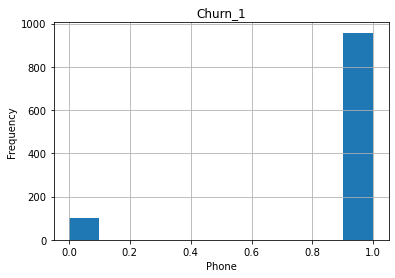

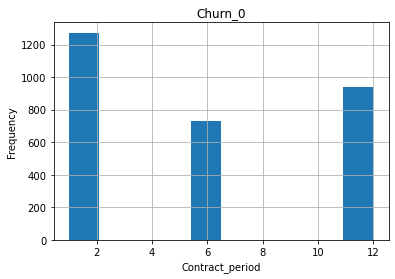

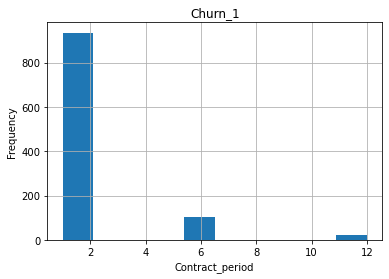

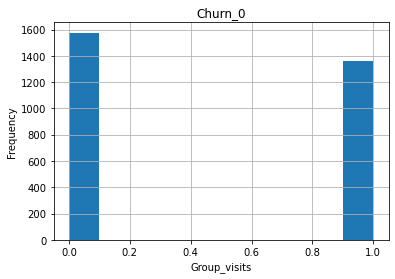

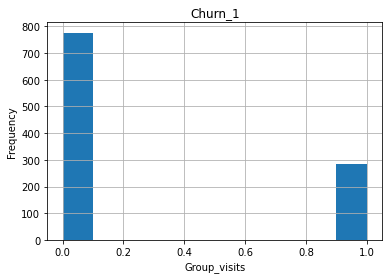

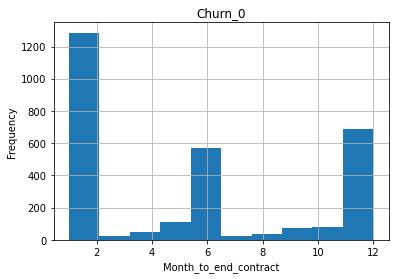

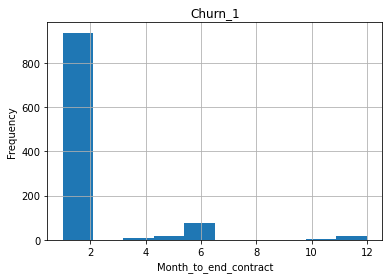

In [10]:
# Столбчатые гистограммы признаков для тех, кто ушёл в отток и остался
plt.title('Столбчатые диаграммы')
for col in gym_churn.drop(['Churn', 'Age', 'Lifetime', 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'], axis = 1).columns:
    plt.title('Churn_0')
    gym_churn[gym_churn['Churn'] == 0][col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.title('Churn_1')
    gym_churn[gym_churn['Churn'] == 1][col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

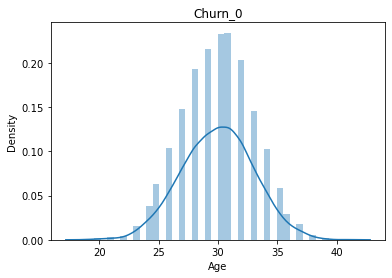

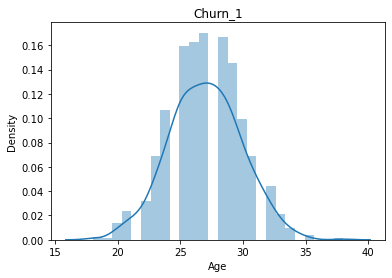

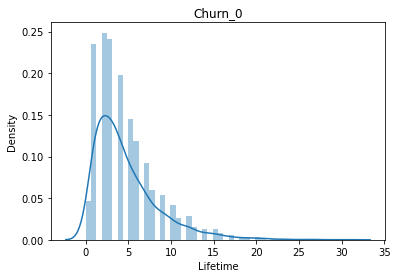

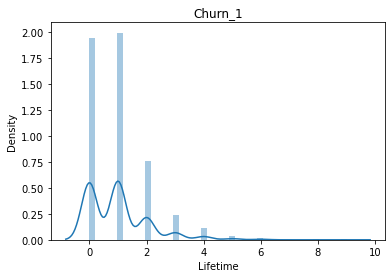

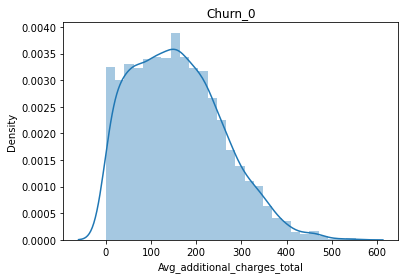

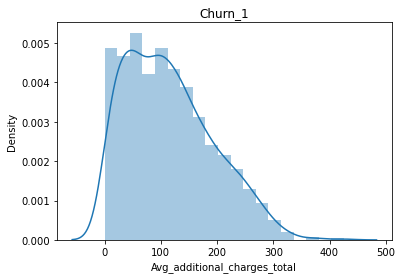

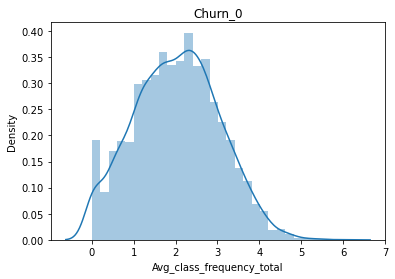

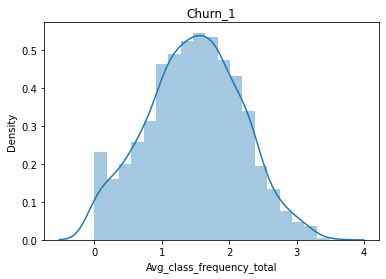

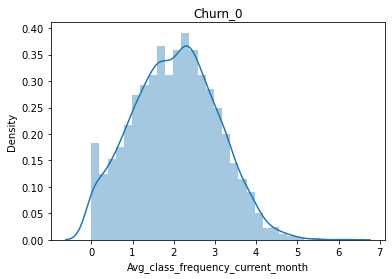

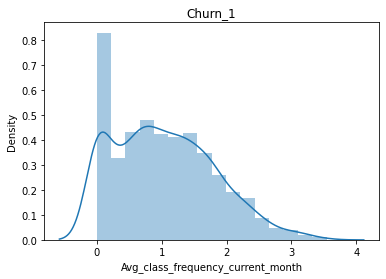

In [11]:
# Распределения признаков для тех, кто ушёл и тех, кто остался
for col in ['Age', 'Lifetime', 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']:
    plt.title('Churn_0')
    sns.distplot(gym_churn[gym_churn['Churn'] == 0][col])
    plt.show()
            
    plt.title('Churn_1')
    sns.distplot(gym_churn[gym_churn['Churn'] == 1][col])
    plt.show()

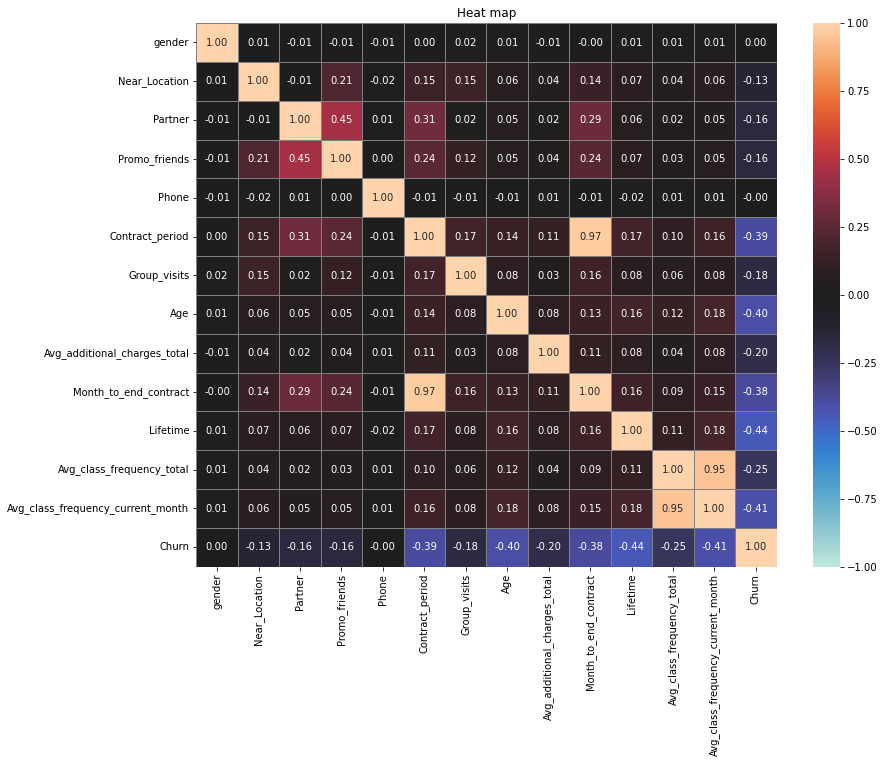

In [12]:
# Построение матрицы корреляций
fig, ax = plt.subplots(figsize=(13, 10))
plt.title('Heat map')
sns.heatmap(gym_churn.corr(),
            annot = True,
            fmt = '.2f',
            vmax = 1,
            center = 0,
            vmin = -1,
            linewidths = 1,
            linecolor = 'gray');

### Выводы

Размер датафрейма составляет 14 столбцов и 4000 строк. В датафрейме нет пропусков и дубликатов. Так же нет ошибочных значений. Типы данных правильные. 

Категориальных признаков нет, все признаки - численные. Ярких выбросов в данных нет. Почти все признаки имеют нормальное распределение.

По тепловой карте видно, что ключевая переменная Churn имеет несильную отрицательную связь (около 0.4) с признаками "длительность текущего действующего абонемента", "Возраст", "срок до окончания текущего действующего абонемента", "время с момента первого обращения в фитнес-центр", "средняя частота посещений в неделю за предыдущий месяц".

Кроме того, есть 2 пары признаков, которые имеют сильную связь: "срок до окончания текущего действующего абонемента" - "длительность текущего действующего абонемента" **0.97** и "средняя частота посещений в неделю за предыдущий месяц" - "средняя частота посещений в неделю за все время с начала действия абонемента" **0.95**. Из-за данных признаков возникнет мультиколлинеарность, и модели подберут нерепрезентативные веса, необходимо это учитывать.

По средним значениям ушедших и оставшихся наблюдается:
- Различий не наблюдается в параметрах **пол** и **наличие контактного телефона**.

- Среди оставшихся клиентов, количество тех, кто **живёт или работает рядом** больше, чем среди ушедших (87% против 77%).

- Среди оставшихся клиентов, количество **сотрудников компаний-партнёров** больше, чем среди ушедших (53% против 36%).

- Среди оставшихся клиентов, количество тех, кто **пришли в рамках акции приведи друга** больше, чем среди ушедших (35% против 18%).

- Среди оставшихся клиентов, **длительность текущего действующего абонемента** составляет 5,7 месяцев, а у ушедших 1,7 месяцев.

- Среди оставшихся клиентов, количество тех, кто **посещает групповые занятия** больше, чем среди ушедших (46% против 27%).

- Среди оставшихся клиентов, **средний возраст** составляет 30 лет, а у ушедших 27 лет.

- Среди оставшихся клиентов, **суммарная выручка от других услуг фитнес-центра** составляет 158 у.е., а у ушедших 115 у.е.

- Среди оставшихся клиентов, **срок до окончания текущего действующего абонемента** составляет 5,3 месяцев, а у ушедших 1,7 месяцев.

- Среди оставшихся клиентов, **время с момента первого обращения в фитнес-центр** составляет 4,7 месяцев, а у ушедших 1 месяц.

- Среди оставшихся клиентов, **средняя частота посещений в неделю за все время с начала действия абонемента** составляет 2 раза, а у ушедших 1,5 раз.

- Среди оставшихся клиентов, **средняя частота посещений в неделю за предыдущий месяц** составляет 2 раза, а у ушедших 1 раз.

Уже на этих данных определяется примерная модель поведения клиентов, которые собираются уйти в "отток". В общем виде это малоактивные клиенты, не являющиеся сотрудниками компаний партнёров, не использующие дополнительные услуги фитнес-центра, не использующих акции и редко посещающие зал с абонементами на короткий срок. Но сила влияния каждого параметра определится в модели.

## Модель прогнозирования оттока клиентов

### Прогнозирование
Для прогнозирования оттока клиентов буду использовать 2 алгоритма: "логистическую регрессию" и "случайный лес".
Для оценки моделей использую метрики accuracy, precision и recall.

Для избежания мультиколлинеарности удалю столбцы 'Month_to_end_contract', 'Avg_additional_charges_total'. Выбирая между "средняя частота посещений в неделю за предыдущий месяц" и "суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон" оставлю первый признак, как наиболее важный.
Выбирая между "длительность текущего действующего абонемента" и "срок до окончания текущего действующего абонемента" оставлю первый, т.к. по нему можно ориентироваться, клиенты с каким абонементом чаще уходят.

In [13]:
# Разделение признаков и целевой переменной
X = gym_churn.drop(['Churn', 'Month_to_end_contract', 'Avg_additional_charges_total'], axis = 1)
y = gym_churn['Churn']

# Разделение выборки на тренировочную и валидационную (без учёта времени, т.к. данные не относятся к временному ряду)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

# Стандартизация данных
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [14]:
# Обучение и применение модели на алгоритме "Логистической регрессии"
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st) # прогноз класса
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1] # вероятность принадлежности объекта к классу 1

In [15]:
# Обучение и применение модели на алгоритме "Случайного леса"
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) # прогноз класса
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # вероятность принадлежности объекта к классу 1

In [16]:
# Функция для вывода метрик
def print_metrics(y_true, y_pred, title='Название метода:'):
    print(title)
    print('\tAccuracy_score: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision_score: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall_score: {:.2f}'.format(recall_score(y_true, y_pred)))
    print()
    
# Метрики для моделей
print_metrics(y_test, lr_predictions, title='Логистическая регрессия:')
print_metrics(y_test, rf_predictions, title='Случайный лес:')

Логистическая регрессия:
	Accuracy_score: 0.93
	Precision_score: 0.89
	Recall_score: 0.84

Случайный лес:
	Accuracy_score: 0.92
	Precision_score: 0.88
	Recall_score: 0.83



In [17]:
# Значение порога
threshold = 0.40

# Новый predict на основании вероятностей и соотношения классов
lr_predictions_custom = [0 if i < threshold else 1 for i in lr_probabilities]
rf_predictions_custom = [0 if i < threshold else 1 for i in rf_probabilities]

print_metrics(y_test, lr_predictions_custom, title='Логистическая регрессия:')
print_metrics(y_test, rf_predictions_custom, title='Случайный лес:')

Логистическая регрессия:
	Accuracy_score: 0.93
	Precision_score: 0.85
	Recall_score: 0.87

Случайный лес:
	Accuracy_score: 0.93
	Precision_score: 0.85
	Recall_score: 0.88



In [18]:
# Таблица с признаками и абсолютными значениями весов
sign = pd.DataFrame(columns = X.columns, data = lr_model.coef_).T.reset_index()
sign['absolute'] = sign[0].abs()
sign.columns = ['Name_sign', 'Value', 'Absolute_value']
sign = sign.sort_values(by = 'Absolute_value', ascending = False)
sign

,Name_sign,Value,Absolute_value
10,Avg_class_frequency_current_month,-4.195352,4.195352
8,Lifetime,-3.527713,3.527713
9,Avg_class_frequency_total,3.122231,3.122231
5,Contract_period,-1.331193,1.331193
7,Age,-1.143489,1.143489
6,Group_visits,-0.387205,0.387205
3,Promo_friends,-0.159077,0.159077
1,Near_Location,-0.059397,0.059397
2,Partner,-0.056926,0.056926
4,Phone,-0.032813,0.032813


### Выводы

Расчёт метрик для обеих моделей на валидационной выборке дал почти равные результаты метрики Accuracy 0.93 и 0.92. Но у данной метрики есть недостаток: наиболее точно она отражает эффективность модели при распределении классов 50/50. В нашем случае классы распределены 73.5 / 26,5 для 0 и 1 соответственно.

Чтобы оценить модель без привязки к соотношению классов, необходимо опираться на метрики Precision и Recall. Судя по ним, модель логистической регрессии немного лучше модели случайного леса:

- Precision:  0.89(логистическая регрессия) и 0.88(случайный лес)
- Recall:  0.84(логистическая регрессия) и 0.83(случайный лес)

Поскольку, в данной задаче определить клиентов, которые собираются уйти и зацепить тех кто уходить не собирается важнее, чем случайно прозевать тех, кто уйдёт в отток, а существенных затрат связанных с клиентами которые собираются уйти нет, метрика Recall становится важнее метрики Precision. Подбирая различные значения порога вероятности, остановился на 0.4. При таком пороге обеспечивается приемлемый баланс между метриками Precision и Recall.

Итак, при новом пороге, обе модели дают одинаковые результаты:

    Accuracy: 0.93
	Precision: 0.85
	Recall: 0.88
    
Ключевыми признаками, влияющими на целевую переменную, являются:

    Avg_class_frequency_current_month - 4.172885
    Lifetime - 3.429000
    Avg_class_frequency_total - 3.115803
    Contract_period - 1.302812
    Age - 1.127255

## Кластеризацию клиентов

### Определение количества кластеров

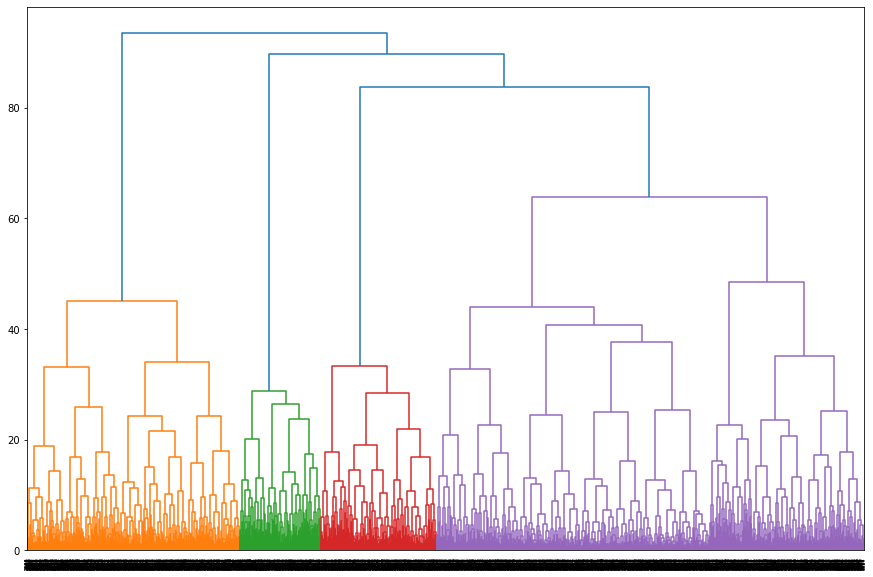

In [19]:
# Использую раннее полученную переменную с признаками X
# Стандартизация данных
sc = StandardScaler()
X_sc = scaler.fit_transform(X)

# Таблица «связок» между объектами
linked = linkage(X_sc, method = 'ward')

# Визуализация дендограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.show()

**На полученной дендограмме определены 4 кластера клиентов, но последний кластер (фиолетовый) получился больше остальных. Клиенты в его начале и конце сильно отличаются друг от друга, поэтому дополнительно разделю его на 2 кластера. Таким образом, итоговое количество кластеров для дальнейшей кластеризации равно 5.**

### Кластеризация на основании алгоритма K-Means

In [20]:
# Стандартизация для переменной с признаками проведена выше
# Применение метода K-Means
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

In [21]:
# Добавление в исходные датафрейм принадлежность к кластерам
gym_churn['Clusters'] = labels

### Информация по кластерам

In [22]:
gym_churn.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Clusters
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,1


In [23]:
# Количество пользователей в кластерах
cluster_count = gym_churn['Clusters'].value_counts().reset_index()
cluster_count['%'] = (cluster_count['Clusters'] / cluster_count['Clusters'].sum() * 100).round(2)
cluster_count.columns = ['Cluster', 'Count', '%']
cluster_count

,Cluster,Count,%
0,3,1175,29.38
1,1,984,24.60
2,2,918,22.95
3,0,538,13.45
4,4,385,9.62


В результате прогнозирования оттока клиентов определились ключевые признаки, наиболее сильно влияющие на целевую переменную. Изучу эти признаки подробнее в разрезе по кластерам.

In [24]:
# Отделение ключевых признаков
gym_churn_top_sign = gym_churn[['Clusters',
                                'Churn',
                                'Lifetime',
                                'Avg_class_frequency_current_month',
                                'Avg_class_frequency_total',
                                'Contract_period',
                                'Age',
                                'Group_visits']]

# Средние значения ключевых признаков по кластерам
gym_churn_top_sign.groupby('Clusters').mean().round(2).sort_values(by='Churn')

,Churn,Lifetime,Avg_class_frequency_current_month,Avg_class_frequency_total,Contract_period,Age,Group_visits
Clusters,,,,,,,
2,0.05,4.98,2.89,2.88,5.07,30.23,0.48
1,0.11,4.45,1.77,1.81,7.87,29.61,0.53
4,0.27,3.92,1.72,1.85,4.76,29.28,0.43
0,0.42,2.92,1.52,1.69,2.88,28.60,0.23
3,0.50,2.44,1.02,1.25,2.51,28.25,0.33


**Кластеры отличаются по доле оттока. Наиболее надёжными являются 1, 2 и 4 кластеры, а 0 и 3 склонны к оттоку.**

**Все остальные признаки имеют такую же тенденцию. В таблице выше отсортированной по убыванию надёжности клиентов кластера, все остальные признаки синхронно убывают.**

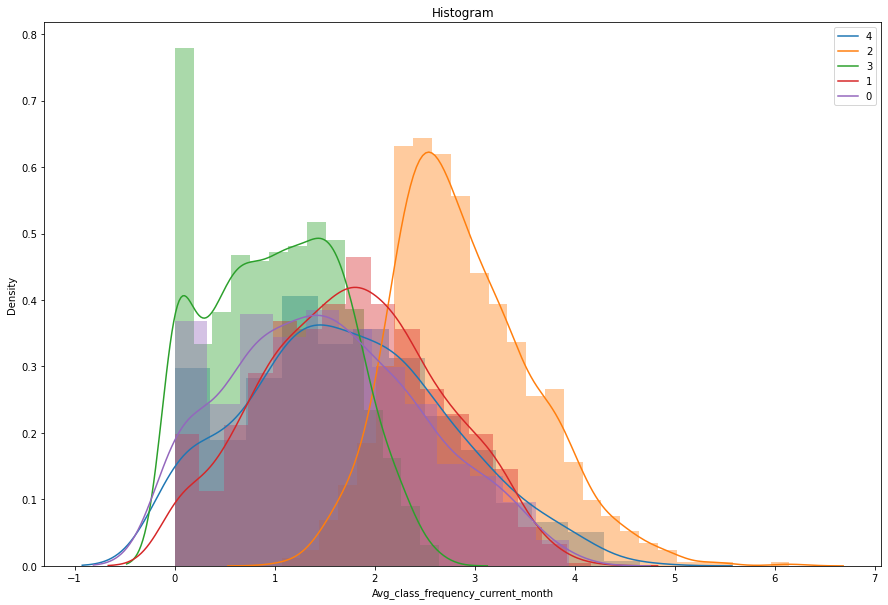

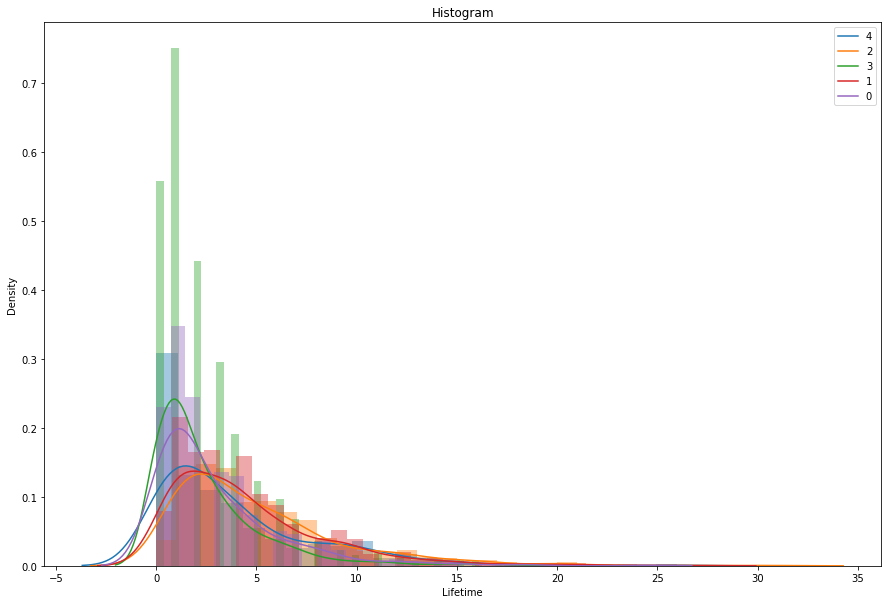

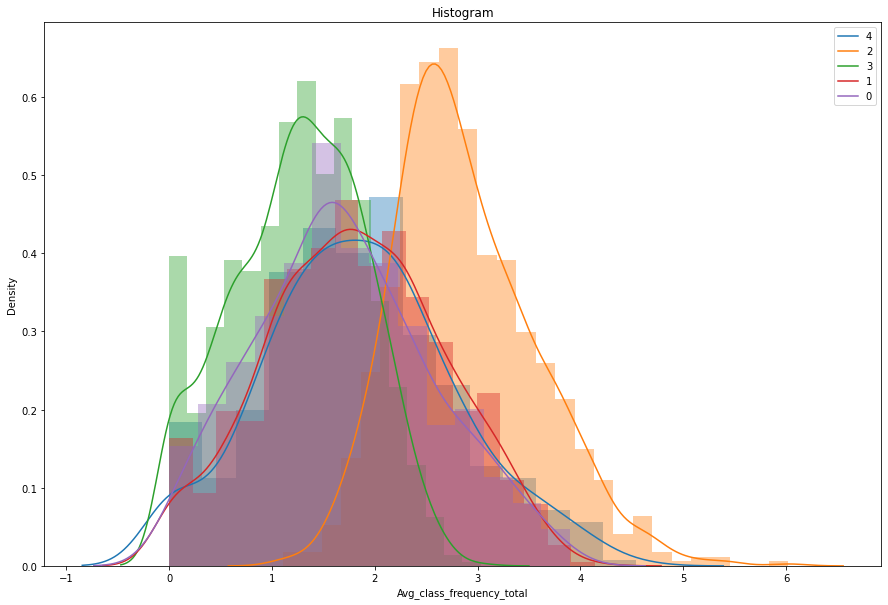

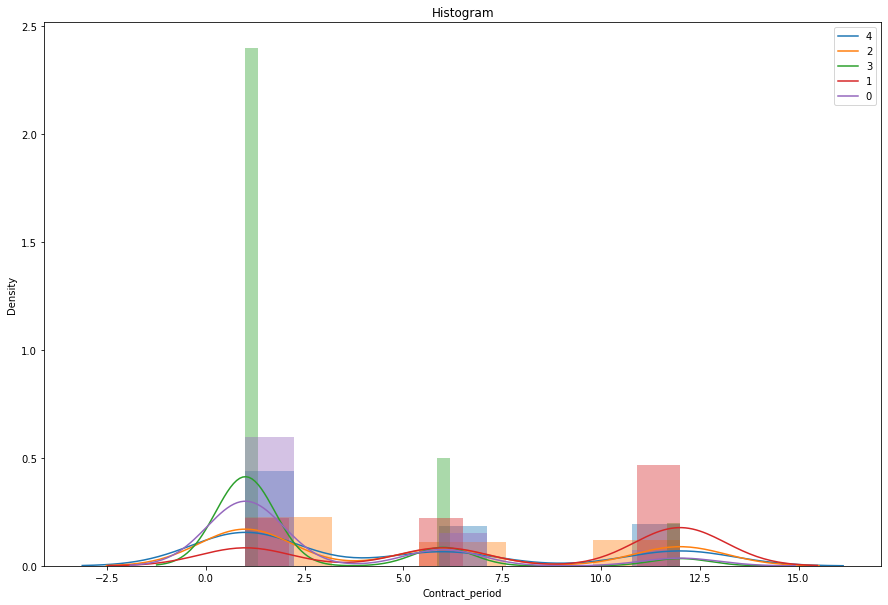

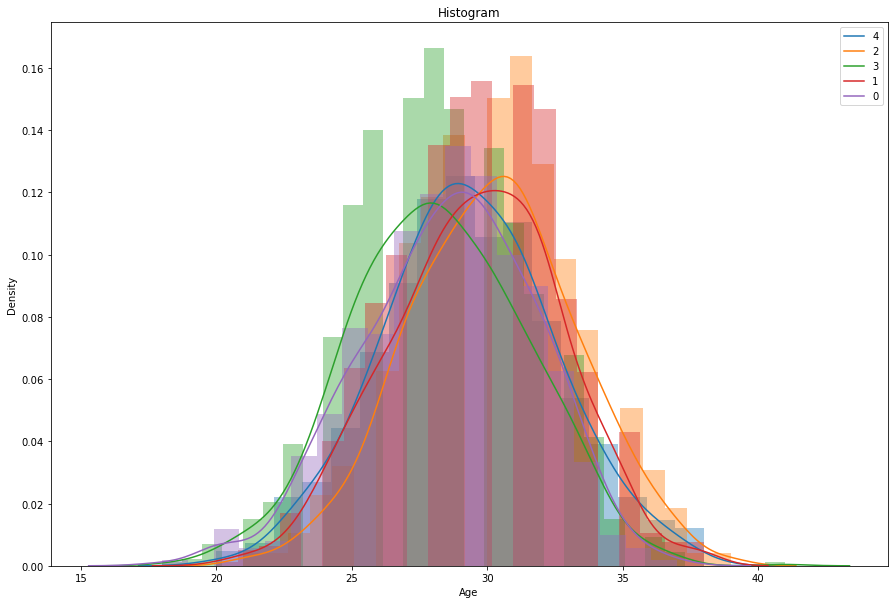

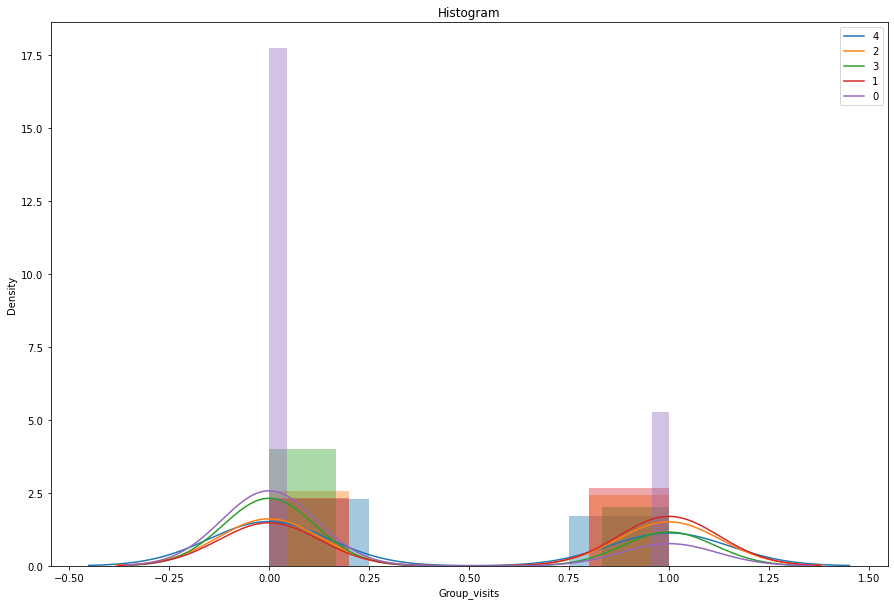

In [25]:
# Построение гистограмм
list_2 = ['Avg_class_frequency_current_month',
          'Lifetime',
          'Avg_class_frequency_total',
          'Contract_period',
          'Age',
          'Group_visits']
for j in list_2:
    plt.figure(figsize=(15, 10))
    for i in gym_churn['Clusters'].unique():
        ax = sns.distplot(gym_churn[gym_churn['Clusters'] == i][j])
    plt.title('Histogram')
    plt.ylabel('Density')
    plt.legend(gym_churn['Clusters'].unique())
    plt.show()

**Все признаки имеют нормальное или смещённое распределение. По гистограммам так же видны различия средних показателей. Сильно отличающимся кластером является 2.**

Доля оттока в %

In [26]:
fraction_churn = gym_churn.groupby('Clusters')['Churn'].mean().reset_index()
fraction_churn['%'] = (fraction_churn['Churn'] * 100).round(2)
fraction_churn.columns = ['Clusters', 'Outflow_share', 'Outflow_share_%']
fraction_churn = fraction_churn.sort_values(by = 'Outflow_share_%', ascending = False)
fraction_churn

,Clusters,Outflow_share,Outflow_share_%
3,3,0.500426,50.04
0,0,0.416357,41.64
4,4,0.267532,26.75
1,1,0.105691,10.57
2,2,0.045752,4.58


### Выводы

По дендрограмме решено разделить клиентов на 5 кластеров. 

В ходе кластеризации на основании алгоритма K-Means клиенты были отнесены к 5 кластерам.

Пользователи по кластерам разделились в следующих соотношениях:

    Cluster	Count	  %
    3		  1175       29.38
    1		  984		24.60
    2		  918		22.95
    0		  538		13.45
    4		  385		9.62

По средним значениям 6 наиболее влияющих признаков наблюдается, что кластеры отличаются по доле оттока. Наиболее надёжными являются 1, 2 и 4 кластеры, а 0 и 3 склонны к оттоку. Средние значения признаков синхронно убывают от наиболее надёжных кластеров к склонным к оттоку.

Доля оттока по кластерам равна:

    Clusters	 Outflow_share_%
    3			50.04
    0			41.64
    4			26.75
    1			10.57
    2			4.58

## Общий вывод

**Исследовательский анализ данных**

Согласно матрице корреляций, ключевая переменная Churn имеет несильную отрицательную связь (около 0.4) с признаками "длительность текущего действующего абонемента", "Возраст", "срок до окончания текущего действующего абонемента", "время с момента первого обращения в фитнес-центр", "средняя частота посещений в неделю за предыдущий месяц".

Кроме того, есть 2 пары признаков, которые имеют сильную связь: "срок до окончания текущего действующего абонемента" - "длительность текущего действующего абонемента" **0.97** и "средняя частота посещений в неделю за предыдущий месяц" - "средняя частота посещений в неделю за все время с начала действия абонемента" **0.95**.

По средним значениям ушедших и оставшихся наблюдается:
- Различий не наблюдается в параметрах **пол** и **наличие контактного телефона**.

- Среди оставшихся клиентов, количество тех, кто **живёт или работает рядом** больше, чем среди ушедших (87% против 77%).

- Среди оставшихся клиентов, количество **сотрудников компаний-партнёров** больше, чем среди ушедших (53% против 36%).

- Среди оставшихся клиентов, количество тех, кто **пришли в рамках акции приведи друга** больше, чем среди ушедших (35% против 18%).

- Среди оставшихся клиентов, **длительность текущего действующего абонемента** составляет 5,7 месяцев, а у ушедших 1,7 месяцев.

- Среди оставшихся клиентов, количество тех, кто **посещает групповые занятия** больше, чем среди ушедших (46% против 27%).

- Среди оставшихся клиентов, **средний возраст** составляет 30 лет, а у ушедших 27 лет.

- Среди оставшихся клиентов, **суммарная выручка от других услуг фитнес-центра** составляет 158 у.е., а у ушедших 115 у.е.

- Среди оставшихся клиентов, **срок до окончания текущего действующего абонемента** составляет 5,3 месяцев, а у ушедших 1,7 месяцев.

- Среди оставшихся клиентов, **время с момента первого обращения в фитнес-центр** составляет 4,7 месяцев, а у ушедших 1 месяц.

- Среди оставшихся клиентов, **средняя частота посещений в неделю за все время с начала действия абонемента** составляет 2 раза, а у ушедших 1,5 раз.

- Среди оставшихся клиентов, **средняя частота посещений в неделю за предыдущий месяц** составляет 2 раза, а у ушедших 1 раз.

**Модель прогнозирования оттока клиентов**

Расчёт метрик для обеих моделей на валидационной выборке дал почти равные результаты метрики Accuracy 0.93 и 0.92. Но у данной метрики есть недостаток: наиболее точно она отражает эффективность модели при распределении классов 50/50. В нашем случае классы распределены 73.5 / 26,5 для 0 и 1 соответственно.

Чтобы оценить модель без привязки к соотношению классов, необходимо опираться на метрики Precision и Recall. Судя по ним, модель логистической регрессии немного лучше модели случайного леса:

    Precision: 0.89(логистическая регрессия) и 0.88(случайный лес)
    Recall: 0.84(логистическая регрессия) и 0.83(случайный лес)

Поскольку, в данной задаче определить клиентов, которые собираются уйти и зацепить тех кто уходить не собирается важнее, чем случайно прозевать тех, кто уйдёт в отток, а существенных затрат связанных с клиентами которые собираются уйти нет, метрика Recall становится важнее метрики Precision. Подбирая различные значения порога вероятности, остановился на 0.4. При таком пороге обеспечивается приемлемый баланс между метриками Precision и Recall.

Итак, при новом пороге, обе модели дают одинаковые результаты:

    Accuracy: 0.93
    Precision: 0.85
    Recall: 0.88

После оценки коэффициентов веса модели определены ключевые признаки, влияющие на целевую переменную:
- Avg_class_frequency_current_month - 4.172885
- Lifetime - 3.429000
- Avg_class_frequency_total - 3.115803
- Contract_period - 1.302812
- Age - 1.127255

**Кластеризацию клиентов**

Клиенты по схожести признаков разделены на 5 кластеров на основании алгоритма K-Means.

Пользователи по кластерам разделились в следующих соотношениях:

    Cluster	Count	  %
    3		  1175       29.38
    1		  984		24.60
    2		  918		22.95
    0		  538		13.45
    4		  385		9.62

По средним значениям 6 наиболее влияющих признаков наблюдается, что кластеры отличаются по доле оттока. Наиболее надёжными являются 1, 2 и 4 кластеры, а 0 и 3 склонны к оттоку. Средние значения признаков синхронно убывают от наиболее надёжных кластеров к склонным к оттоку.

Доля оттока по кластерам равна:

    Clusters	 Outflow_share_%
    3			50.04
    0			41.64
    4			26.75
    1			10.57
    2			4.58

Итак, к оттоку склонны клиенты, относящиеся к 0 и 3 кластерам. Такие клиенты, по 5 ключевым признакам имеют:
- время с момента первого обращения в фитнес-центр около 3 месяцев и менее,
- меньший возраст в районе 28 лет по сравнению с самым надёжным кластером 30 лет,
- длительность текущего действующего абонемента около 2,9 месяцев и менее,
- средняя частота посещений в неделю за предыдущий месяц около 1,5 месяцев и менее,
- средняя частота посещений в неделю за все время с начала действия абонемента около 1,7 и менее.

Важность каждого признака определена коэффициентом от 0 до максимального 4,17 относительно всех признаков:

    - средняя частота посещений в неделю за предыдущий месяц						      4.17
    - время с момента первого обращения в фитнес-центр (в месяцах)						3.43
    - средняя частота посещений в неделю за все время с начала действия абонемента		3.12
    - длительность текущего действующего абонемента (в месяцах)						   1.30
    - возраст																		     1.13
    - факт посещения групповых занятий													0.38


**Рекомендации**

По падению данных показателей и отнесению клиента к кластеру склонным к оттоку можно отслеживать клиентов, уходящих в "отток".

Поскольку чаще уходят новые клиенты, и абонемент  у таких клиентов в среднем на 3 месяца, необходимо заинтересовывать клиентов приобретать абонементы на более долгие сроки. Клиенты с абонементами 6 месяцев и более относятся к надёжным кластерам.

Если в течение месяца клиент посещал зал в среднем 1,5 раза в неделю, скорее всего он уйдёт в "отток".

Доля тех, кто посещает групповые занятия среди клиентов способных уйти в отток находится на уровне 30%, в то время как в надёжных кластерах такая доля 43 - 53%. Вероятно людям проще заниматься по готовой программе с тренером, особенно новичкам.

Итак, по ключевым признакам и отнесению к кластеру "ненадёжных" нужно отслеживать клиентов, которые уйдут в "отток". Через менеджеров узнать причину ухода клиента и постараться на это повлиять, например, предложить скидку на абонемент на 1-12 месяцев или же рассказать о возможности посещать групповые занятия с тренером по разным направлениям.